# Phase 2 - Feature Extraction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud
from collections import Counter

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt') 
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kshitijmittal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kshitijmittal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/kshitijmittal/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kshitijmittal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kshitijmittal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
proc_data=pd.read_csv('/Users/kshitijmittal/Desktop/automatic-essay-grading/data/preprocessed-essay.csv')
proc_data.head()

text_id                                          full_text  cohesion  \
0  0016926B079C  I think that students would benefit from learn...       3.5   
1  0022683E9EA5  When a problem is a change you have to let it ...       2.5   
2  00299B378633  Dear, Principal\n\nIf u change the school poli...       3.0   
3  003885A45F42  The best time in life is when you become yours...       4.5   
4  0049B1DF5CCC  Small act of kindness can impact in other peop...       2.5   

   syntax  vocabulary  phraseology  grammar  conventions  \
0     3.5         3.0          3.0      4.0          3.0   
1     2.5         3.0          2.0      2.0          2.5   
2     3.5         3.0          3.0      3.0          2.5   
3     4.5         4.5          4.5      4.0          5.0   
4     3.0         3.0          3.0      2.5          2.5   

                               cleaned_tokenize_text  \
0  think students would benefit learning home won...   
1  problem change let best matter happening chang...   
2  dear principal change school policy grade aver...   
3  best time life become agree greatest accomplis...   
4  small act kindness impact people change people...   

                                      corrected_text  ... sent_count  \
0  think students would benefit learning home won...  ...         18   
1  problem change let best matter happening chang...  ...         14   
2  dear principal change school policy grade aver...  ...         19   
3  best time life become agree greatest accomplis...  ...         36   
4  small act kindness impact people change people...  ...          3   

    sent_len                                           mistakes num_mistakes  \
0  14.500000                                                NaN            0   
1  38.071429                                                NaN            0   
2  16.842105                                                NaN            0   
3  20.222222                                                NaN            0   
4  78.000000  kindess homeles triying greate kindess wount t...           11   

   word_count  noun_count  verb_count  adjective_count  adverb_count  \
0         261          61          25               25             5   
1         533         100          56               37             9   
2         320          58          20               33             5   
3         728         106          73               62            22   
4         234          58          21               18             5   

   Score_Category  
0          medium  
1          medium  
2          medium  
3            high  
4          medium  

[5 rows x 21 columns]

In [6]:
proc_data['lemmatized_text']

0       think student would benefit learn home wont ch...
1       problem change let best matter happen change m...
2       dear principal change school policy grade aver...
3       best time life become agree great accomplishme...
4       small act kindness impact people change people...
                              ...                        
3906    believe use cellphone class education goodbye ...
3907    work alone student argue decision project work...
3908    problem chance best think quote cant best ever...
3909    many people disagree albert schweitzer quote e...
3910    think failure main thing people consist goal s...
Name: lemmatized_text, Length: 3911, dtype: object

In [7]:
proc_data['lemmatized_text'].isna().sum()

0

In [11]:
def string_to_list(string):
    return string.split()

In [13]:
proc_data['lemmatized_text']=proc_data['lemmatized_text'].apply(lambda x: string_to_list(x))

AttributeError: 'list' object has no attribute 'split'

In [16]:
proc_data['lemmatized_text']

0       [think, student, would, benefit, learn, home, ...
1       [problem, change, let, best, matter, happen, c...
2       [dear, principal, change, school, policy, grad...
3       [best, time, life, become, agree, great, accom...
4       [small, act, kindness, impact, people, change,...
                              ...                        
3906    [believe, use, cellphone, class, education, go...
3907    [work, alone, student, argue, decision, projec...
3908    [problem, chance, best, think, quote, cant, be...
3909    [many, people, disagree, albert, schweitzer, q...
3910    [think, failure, main, thing, people, consist,...
Name: lemmatized_text, Length: 3911, dtype: object

### CountVectorizer

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
#vectorizer.fit(proc_data['lemmatized_text'])

In [25]:
proc_data['lemmatized_text'].apply(lambda x: ' '.join(x))

0       think student would benefit learn home wont ch...
1       problem change let best matter happen change m...
2       dear principal change school policy grade aver...
3       best time life become agree great accomplishme...
4       small act kindness impact people change people...
                              ...                        
3906    believe use cellphone class education goodbye ...
3907    work alone student argue decision project work...
3908    problem chance best think quote cant best ever...
3909    many people disagree albert schweitzer quote e...
3910    think failure main thing people consist goal s...
Name: lemmatized_text, Length: 3911, dtype: object

In [26]:
vectorized_text=vectorizer.fit_transform(proc_data['lemmatized_text'].apply(lambda x: ' '.join(x)))

In [28]:
df_vectorized = pd.DataFrame(vectorized_text.toarray(), columns=vectorizer.get_feature_names())

In [29]:
df_vectorized

021419  03102020  031219  031519  03192019  032019  03202019  0492019  \
0          0         0       0       0         0       0         0        0   
1          0         0       0       0         0       0         0        0   
2          0         0       0       0         0       0         0        0   
3          0         0       0       0         0       0         0        0   
4          0         0       0       0         0       0         0        0   
...      ...       ...     ...     ...       ...     ...       ...      ...   
3906       0         0       0       0         0       0         0        0   
3907       0         0       0       0         0       0         0        0   
3908       0         0       0       0         0       0         0        0   
3909       0         0       0       0         0       0         0        0   
3910       0         0       0       0         0       0         0        0   

      050  100  ...  zealand  zealous  zelda  zero  zip  zombie  zone  zoo  \
0       0    0  ...        0        0      0     0    0       0     0    0   
1       0    0  ...        0        0      0     0    0       0     0    0   
2       0    0  ...        0        0      0     0    0       0     0    0   
3       0    0  ...        0        0      0     0    0       0     0    0   
4       0    0  ...        0        0      0     0    0       0     0    0   
...   ...  ...  ...      ...      ...    ...   ...  ...     ...   ...  ...   
3906    0    0  ...        0        0      0     0    0       0     0    0   
3907    0    0  ...        0        0      0     0    0       0     0    0   
3908    0    0  ...        0        0      0     0    0       0     0    0   
3909    0    0  ...        0        0      0     0    0       0     0    0   
3910    0    0  ...        0        0      0     0    0       0     0    0   

      zoology  zurkrbuirg  
0           0           0  
1           0           0  
2           0           0  
3           0           0  
4           0           0  
...       ...         ...  
3906        0           0  
3907        0           0  
3908        0           0  
3909        0           0  
3910        0           0  

[3911 rows x 10275 columns]

In [30]:
df_vectorized.isna().sum().sum()

0

In [31]:
df_vectorized_array = df_vectorized.apply(lambda x: x.values if len(x.values.shape) == 1 else np.concatenate([x.values]), axis=1)

In [32]:
df_vectorized_array

0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                              ...                        
3906    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3907    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3908    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3909    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3910    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Length: 3911, dtype: object

In [33]:
proc_data_2=proc_data.copy()
proc_data_2['count_vector']=df_vectorized_array

In [35]:
proc_data_2.head()

text_id                                          full_text  cohesion  \
0  0016926B079C  I think that students would benefit from learn...       3.5   
1  0022683E9EA5  When a problem is a change you have to let it ...       2.5   
2  00299B378633  Dear, Principal\n\nIf u change the school poli...       3.0   
3  003885A45F42  The best time in life is when you become yours...       4.5   
4  0049B1DF5CCC  Small act of kindness can impact in other peop...       2.5   

   syntax  vocabulary  phraseology  grammar  conventions  \
0     3.5         3.0          3.0      4.0          3.0   
1     2.5         3.0          2.0      2.0          2.5   
2     3.5         3.0          3.0      3.0          2.5   
3     4.5         4.5          4.5      4.0          5.0   
4     3.0         3.0          3.0      2.5          2.5   

                               cleaned_tokenize_text  \
0  think students would benefit learning home won...   
1  problem change let best matter happening chang...   
2  dear principal change school policy grade aver...   
3  best time life become agree greatest accomplis...   
4  small act kindness impact people change people...   

                                      corrected_text  ...   sent_len  \
0  think students would benefit learning home won...  ...  14.500000   
1  problem change let best matter happening chang...  ...  38.071429   
2  dear principal change school policy grade aver...  ...  16.842105   
3  best time life become agree greatest accomplis...  ...  20.222222   
4  small act kindness impact people change people...  ...  78.000000   

                                            mistakes  num_mistakes word_count  \
0                                                NaN             0        261   
1                                                NaN             0        533   
2                                                NaN             0        320   
3                                                NaN             0        728   
4  kindess homeles triying greate kindess wount t...            11        234   

   noun_count  verb_count  adjective_count  adverb_count  Score_Category  \
0          61          25               25             5          medium   
1         100          56               37             9          medium   
2          58          20               33             5          medium   
3         106          73               62            22            high   
4          58          21               18             5          medium   

                                        count_vector  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  

[5 rows x 22 columns]

### TF-IDF

In [45]:
def tf_idf(data):
    vectorizer = TfidfVectorizer(ngram_range=(1,1),min_df=10,max_features=100)
    vec_text = vectorizer.fit_transform(data)
    X = pd.DataFrame.sparse.from_spmatrix(vec_text)
    X.columns = vectorizer.get_feature_names_out().tolist()
    X=X.reset_index(drop=True)
    data=data.reset_index(drop=True)
    newdata = pd.concat([data, X],axis=1)
    del X
    gc.collect()
    return newdata


In [46]:
proc_data_2.head()

text_id                                          full_text  cohesion  \
0  0016926B079C  I think that students would benefit from learn...       3.5   
1  0022683E9EA5  When a problem is a change you have to let it ...       2.5   
2  00299B378633  Dear, Principal\n\nIf u change the school poli...       3.0   
3  003885A45F42  The best time in life is when you become yours...       4.5   
4  0049B1DF5CCC  Small act of kindness can impact in other peop...       2.5   

   syntax  vocabulary  phraseology  grammar  conventions  \
0     3.5         3.0          3.0      4.0          3.0   
1     2.5         3.0          2.0      2.0          2.5   
2     3.5         3.0          3.0      3.0          2.5   
3     4.5         4.5          4.5      4.0          5.0   
4     3.0         3.0          3.0      2.5          2.5   

                               cleaned_tokenize_text  \
0  think students would benefit learning home won...   
1  problem change let best matter happening chang...   
2  dear principal change school policy grade aver...   
3  best time life become agree greatest accomplis...   
4  small act kindness impact people change people...   

                                      corrected_text  ...   sent_len  \
0  think students would benefit learning home won...  ...  14.500000   
1  problem change let best matter happening chang...  ...  38.071429   
2  dear principal change school policy grade aver...  ...  16.842105   
3  best time life become agree greatest accomplis...  ...  20.222222   
4  small act kindness impact people change people...  ...  78.000000   

                                            mistakes  num_mistakes word_count  \
0                                                NaN             0        261   
1                                                NaN             0        533   
2                                                NaN             0        320   
3                                                NaN             0        728   
4  kindess homeles triying greate kindess wount t...            11        234   

   noun_count  verb_count  adjective_count  adverb_count  Score_Category  \
0          61          25               25             5          medium   
1         100          56               37             9          medium   
2          58          20               33             5          medium   
3         106          73               62            22            high   
4          58          21               18             5          medium   

                                        count_vector  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  

[5 rows x 22 columns]

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF_vectorizer = TfidfVectorizer(ngram_range=(1,1),min_df=10)

In [50]:
vec_text_tfidf=TFIDF_vectorizer.fit_transform(proc_data['lemmatized_text'].apply(lambda x: ' '.join(x)))

In [51]:
df_vectorized_tfid = pd.DataFrame(vec_text_tfidf.toarray())
#df_vectorized = pd.DataFrame(vectorized_text.toarray(), columns=vectorizer.get_feature_names())

In [52]:
df_vectorized_tfidf = pd.DataFrame(vec_text_tfidf.toarray())
df_vectorized_tfidf.columns = TFIDF_vectorizer.get_feature_names()

In [53]:
df_vectorized_tfidf.head()

100  1000  2015  2019  911  ability      able  about  absent  absolutely  \
0  0.0   0.0   0.0   0.0  0.0      0.0  0.000000    0.0     0.0         0.0   
1  0.0   0.0   0.0   0.0  0.0      0.0  0.000000    0.0     0.0         0.0   
2  0.0   0.0   0.0   0.0  0.0      0.0  0.101337    0.0     0.0         0.0   
3  0.0   0.0   0.0   0.0  0.0      0.0  0.026209    0.0     0.0         0.0   
4  0.0   0.0   0.0   0.0  0.0      0.0  0.000000    0.0     0.0         0.0   

   ...  york     you  young  your  yourself  youth  youtube  zero  zone  zoo  
0  ...   0.0  0.1016    0.0   0.0       0.0    0.0      0.0   0.0   0.0  0.0  
1  ...   0.0  0.0000    0.0   0.0       0.0    0.0      0.0   0.0   0.0  0.0  
2  ...   0.0  0.0000    0.0   0.0       0.0    0.0      0.0   0.0   0.0  0.0  
3  ...   0.0  0.0000    0.0   0.0       0.0    0.0      0.0   0.0   0.0  0.0  
4  ...   0.0  0.0000    0.0   0.0       0.0    0.0      0.0   0.0   0.0  0.0  

[5 rows x 2425 columns]

In [54]:
df_vectorized_tfidf_array = df_vectorized_tfidf.apply(lambda x: x.values if len(x.values.shape) == 1 else np.concatenate([x.values]), axis=1)

In [55]:
proc_data_3=proc_data_2.copy()
proc_data_3['tfidf_vector']=df_vectorized_tfidf_array

In [56]:
proc_data_3.head()

text_id                                          full_text  cohesion  \
0  0016926B079C  I think that students would benefit from learn...       3.5   
1  0022683E9EA5  When a problem is a change you have to let it ...       2.5   
2  00299B378633  Dear, Principal\n\nIf u change the school poli...       3.0   
3  003885A45F42  The best time in life is when you become yours...       4.5   
4  0049B1DF5CCC  Small act of kindness can impact in other peop...       2.5   

   syntax  vocabulary  phraseology  grammar  conventions  \
0     3.5         3.0          3.0      4.0          3.0   
1     2.5         3.0          2.0      2.0          2.5   
2     3.5         3.0          3.0      3.0          2.5   
3     4.5         4.5          4.5      4.0          5.0   
4     3.0         3.0          3.0      2.5          2.5   

                               cleaned_tokenize_text  \
0  think students would benefit learning home won...   
1  problem change let best matter happening chang...   
2  dear principal change school policy grade aver...   
3  best time life become agree greatest accomplis...   
4  small act kindness impact people change people...   

                                      corrected_text  ...  \
0  think students would benefit learning home won...  ...   
1  problem change let best matter happening chang...  ...   
2  dear principal change school policy grade aver...  ...   
3  best time life become agree greatest accomplis...  ...   
4  small act kindness impact people change people...  ...   

                                            mistakes  num_mistakes  \
0                                                NaN             0   
1                                                NaN             0   
2                                                NaN             0   
3                                                NaN             0   
4  kindess homeles triying greate kindess wount t...            11   

   word_count noun_count  verb_count  adjective_count  adverb_count  \
0         261         61          25               25             5   
1         533        100          56               37             9   
2         320         58          20               33             5   
3         728        106          73               62            22   
4         234         58          21               18             5   

   Score_Category                                       count_vector  \
0          medium  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1          medium  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2          medium  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3            high  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4          medium  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                        tfidf_vector  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1013370114925...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0262089932239...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  

[5 rows x 23 columns]

In [57]:
proc_data_3['tfidf_vector']

0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1013370114925...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0262089932239...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
3906    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3907    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0599181271098...
3908    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3909    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3910    [0.0, 0.0, 0.0, 0.0, 0.0, 0.045831299837925034...
Name: tfidf_vector, Length: 3911, dtype: object

In [62]:
proc_data_3['lemmatized_text']
for x in proc_data_3['lemmatized_text']:
    print(eval(x))

TypeError: eval() arg 1 must be a string, bytes or code object

## Word2Vec + KMeans

In [58]:
import os
import random
import re
import string

from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

SEED = 42
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)


In [64]:
processed_essays=[]

for x in proc_data_3['lemmatized_text']:
    processed_essays.append(x)

processed_essays

[['think',
  'student',
  'would',
  'benefit',
  'learn',
  'home',
  'wont',
  'change',
  'get',
  'early',
  'morning',
  'shower',
  'hair',
  'take',
  'class',
  'help',
  'house',
  'pay',
  'attention',
  'comfortable',
  'home',
  'hardest',
  'part',
  'school',
  'get',
  'ready',
  'wake',
  'brush',
  'teeth',
  'closet',
  'look',
  'cloth',
  'think',
  'picked',
  'outfit',
  'look',
  'mirror',
  "you'll",
  'either',
  'like',
  'look',
  'see',
  'stain',
  'change',
  'online',
  'class',
  'wear',
  'anything',
  'stay',
  'home',
  'wont',
  'need',
  'stress',
  'wear',
  'student',
  'usually',
  'take',
  'shower',
  'school',
  'either',
  'take',
  'sleep',
  'wake',
  'student',
  'smell',
  'good',
  'cause',
  'miss',
  'bus',
  'effect',
  'lesson',
  'time',
  'cause',
  'come',
  'late',
  'school',
  'online',
  'class',
  'wont',
  'need',
  'miss',
  'lesson',
  'cause',
  'get',
  'everything',
  'set',
  'take',
  'shower',
  'get',
  'ready',
  '

Train Word2Vec Model

In [65]:
W2V_model = Word2Vec(sentences=processed_essays, vector_size=100, workers=1, seed=SEED)

In [66]:
W2V_model.wv.most_similar("people")

[('others', 0.6974716186523438),
 ('everybody', 0.6119298338890076),
 ('someone', 0.5914008021354675),
 ('person', 0.5779016613960266),
 ('treat', 0.5327606201171875),
 ('somebody', 0.5240316390991211),
 ('side', 0.5126851797103882),
 ('depend', 0.4998084008693695),
 ('surround', 0.4980156421661377),
 ('matter', 0.4935484826564789)]

In [67]:
W2V_model.wv.most_similar("school")

[('schedule', 0.7056289315223694),
 ('regular', 0.6349310278892517),
 ('student', 0.6337170600891113),
 ('extra', 0.6326609253883362),
 ('class', 0.5883139371871948),
 ('early', 0.5796304941177368),
 ('flexible', 0.5709277987480164),
 ('skip', 0.5667584538459778),
 ('four', 0.5544793605804443),
 ('available', 0.54941725730896)]

In [68]:
W2V_model.wv.most_similar("student")

[('school', 0.6337171196937561),
 ('pace', 0.6287932395935059),
 ('subject', 0.6270602345466614),
 ('program', 0.6017397046089172),
 ('class', 0.6004678606987),
 ('concentrate', 0.5917266011238098),
 ('extra', 0.5872762203216553),
 ('stressful', 0.5799729824066162),
 ('flexible', 0.5775858163833618),
 ('focus', 0.5717440247535706)]

Create a vector per document by averaging its word vectors

In [69]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

In [70]:
vectorized_essays = vectorize(processed_essays, model=W2V_model)
len(vectorized_essays), len(vectorized_essays[0])

(3911, 100)

In [72]:
vectorized_essays[0]

array([ 0.19211559, -0.38364977, -0.2919321 , -0.28527287,  0.1379609 ,
        0.14315335,  0.36699668,  0.1589912 , -0.15744571,  0.2860797 ,
       -0.49122146, -0.02957916,  0.27959514,  0.30835882, -0.07612307,
        0.4145534 ,  0.17935997, -0.35211766,  0.07666693, -0.9294875 ,
        0.0366772 ,  0.15274346,  0.12176708,  0.29179308,  0.48293784,
       -0.8128443 , -0.2567529 ,  0.1746431 , -0.3836113 , -0.00472757,
       -0.6004454 ,  0.08231609,  0.02511097, -0.15031728, -0.174554  ,
       -0.1597164 ,  0.13620475, -0.3464784 ,  0.08595882,  0.3326673 ,
        0.4738315 , -0.10549122,  0.52831537, -0.20503825, -0.16850875,
       -0.16642039,  0.13960496,  0.19546844,  0.8283712 ,  0.11706585,
       -0.05397909, -0.1815406 ,  0.08720875, -0.10527779,  0.16015415,
       -0.13099259,  0.24693346, -0.08647648, -0.07807807,  0.07681663,
        0.21424653, -0.07044382, -0.43714863,  0.17461158,  0.25827074,
        0.32959753,  0.22264622,  0.27904913, -0.16332161, -0.32

#### Creating Clusters
KMeans Algo

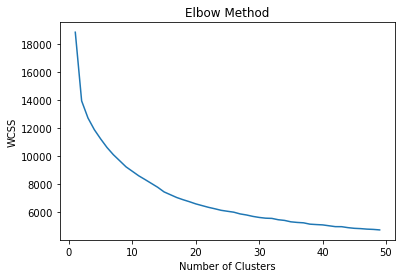

In [83]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 50):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(vectorized_essays)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 50), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [91]:
from sklearn import cluster
from sklearn import metrics

kmeans = cluster.KMeans(n_clusters=30)

kmeans.fit(vectorized_essays) 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(vectorized_essays))
 
silhouette_score = metrics.silhouette_score(vectorized_essays, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[20 19 29 ... 25  3 17]
Centroids data
[[ 0.02400034 -0.04573338  0.00188524 ...  0.55455772 -0.01353546
   0.06495564]
 [ 0.26055646 -0.15469304 -0.0637699  ...  0.31840812 -0.01113389
  -0.0908724 ]
 [ 0.34566154 -0.03941946 -0.19641274 ... -0.19057869 -0.14617642
  -0.17261832]
 ...
 [ 0.17482506 -0.10280469 -0.22424018 ... -0.04602234 -0.26066659
  -0.12756627]
 [ 0.27822155 -0.26585441 -0.05699473 ...  0.14743784  0.09288517
  -0.06243169]
 [ 0.08848742 -0.0841105  -0.25925546 ...  0.18063484 -0.1237735
  -0.22510014]]
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-5637.993615452478
Silhouette_score: 
0.19528913


In [93]:
print("Most representative terms per cluster (based on centroids):")
for i in range(30):
    tokens_per_cluster = ""
    most_representative = W2V_model.wv.most_similar(positive=[kmeans.cluster_centers_[i]], topn=20)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")

Most representative terms per cluster (based on centroids):
Cluster 0: nowadays antisocial harmful misuse technology communicates connection sociable vice outer technological efficiency sussed destroy transport incorrectly sacred everywhere contact facility 
Cluster 1: somethings doesn't your actively accomplish you've something always satisfied themselves complicate thirdly enthusiastic push wonderful int retry appreciate tough willing 
Cluster 2: graduate earlier early prepare collage credit graduation finish prepared college carrier highschool flexible available enter rush requirement diploma fulltime certificate 
Cluster 3: chooses ourself yourself if themselves depends humidity persuade int reputation intention demonstrate pathway differently realise appearance you carefully reflect judgment 
Cluster 4: relaxation summer evening stressful shorter longer period rush relief opt yearround plus schoolwork vacation flexible available reduces educator nigh obligation 
Cluster 5: themsel

In [99]:
test_cluster = 1
most_representative_docs = np.argsort(
    np.linalg.norm(vectorized_essays - kmeans.cluster_centers_[test_cluster], axis=1)
)
for d in most_representative_docs[:3]:
    print(proc_data_3['full_text'][d])
    print("-------------")

Thomas Jefferson wrote,"Determine never to be idle...Its is wonderful how much may be done if we are always doing". Do we accomplish more if we are always doing something,or does inactivity also serve a purpose?

The way you determine to do things is pushing yourself to do it, nobody gonna be there to tell you, when you gotta get your stuff done. We the people shouldn't be idle at all ,it would be boring ,not doing anything like just relax at home,and get fat on the couch,being lazy from time, to time isn't as bad. Also you want to have a break,so you won't stress out as much. Most people are determine to be inactivity and will get upset or,have a panic attack,health issues,It can affect your life to be honest ,and it sucks! that's how life is,it gets harder,and harder and you need to motivate yourself, makes your mind stronger. People who don't motivate themselves they got to at least try to get things done, and it never gets any easier....you just got to do it like this essay;I'm wri

In [ ]:
from nltk.cluster import KMeansClusterer
NUM_CLUSTERS=30
kclusterer30 = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters_30 = kclusterer30.cluster(vectorized_essays, assign_clusters=True)
print (assigned_clusters_30)

In [ ]:
df_clusters = pd.DataFrame({
    "text": proc_data_3['full_text'],
    "tokens": [" ".join(text) for text in processed_essays],
    "cluster": 
})

df_clusters

In [ ]:
from nltk.cluster import KMeansClusterer
NUM_CLUSTERS=50
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(vectorized_essays, assign_clusters=True)
print (assigned_clusters)

In [86]:
print("Most representative terms per cluster (based on centroids):")
for i in range(50):
    tokens_per_cluster = ""
    most_representative = W2V_model.wv.most_similar(positive=[kclusterer._centroid[i]], topn=20)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")

Most representative terms per cluster (based on centroids):


TypeError: 'method' object is not subscriptable

In [87]:
from sklearn import cluster
from sklearn import metrics

kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(vectorized_essays)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(vectorized_essays))
 
silhouette_score = metrics.silhouette_score(vectorized_essays, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[ 5 24  6 ... 14 24 26]
Centroids data
[[ 0.22894374 -0.08893988 -0.12281658 ...  0.37687881  0.03587583
   0.04179379]
 [ 0.08434731 -0.18193901 -0.17317421 ... -0.01742676 -0.14306368
  -0.43253687]
 [ 0.04631251  0.21077638 -0.35786854 ...  0.23660595 -0.32358148
  -0.15840169]
 ...
 [ 0.00433592 -0.31377605 -0.05525045 ...  0.056937   -0.10276686
  -0.03287406]
 [ 0.23999073 -0.07224559 -0.19788512 ...  0.4353842   0.2892166
  -0.08127871]
 [ 0.21348551 -0.23417591 -0.19035854 ...  0.07918272 -0.08845935
  -0.02839031]]
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-5674.73860992042
Silhouette_score: 
0.19011441


In [55]:
df_clusters = pd.DataFrame({
    "text": proc_data_3['full_text'],
    "tokens": [" ".join(text) for text in processed_essays],
    "cluster": cluster_labels
})

df_clusters

text  \
0     I think that students would benefit from learn...   
1     When a problem is a change you have to let it ...   
2     Dear, Principal\n\nIf u change the school poli...   
3     The best time in life is when you become yours...   
4     Small act of kindness can impact in other peop...   
...                                                 ...   
3906  I believe using cellphones in class for educat...   
3907  Working alone, students do not have to argue w...   
3908  "A problem is a chance for you to do your best...   
3909  Many people disagree with Albert Schweitzer's ...   
3910  Do you think that failure is the main thing fo...   

                                                 tokens  cluster  
0     think student would benefit learn home wont ch...        2  
1     problem change let best matter happen change m...       22  
2     dear principal change school policy grade aver...       41  
3     best time life become agree great accomplishme...       39  
4     small act kindness impact people change people...       47  
...                                                 ...      ...  
3906  believe use cellphone class education goodbad ...       13  
3907  work alone student argue decission proyects wo...       11  
3908  problem chance best think quote cant best ever...       35  
3909  many people disagree albert schweitzer quote e...       39  
3910  think failure main thing people consist goal s...       29  

[3911 rows x 3 columns]

In [57]:
print("Most representative terms per cluster (based on centroids):")
for i in range(50):
    tokens_per_cluster = ""
    most_representative = W2V_model.wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=10)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")

Most representative terms per cluster (based on centroids):
Cluster 0: doesnt acomplish exploit retry somehing deserve becasue diong someting quicker 
Cluster 1: oportunity earlier early collage prepare fulltime univercity oportunities attened gradute 
Cluster 2: eveyday flexible oportunity homeschooling lecture concentrate benificial consentrate student attent 
Cluster 3: zoo exit pet blast relative beatiful funnest outdoors picnic dive 
Cluster 4: blind nowadays technologly comunication forgotten sociable inform beside that bout 
Cluster 5: enthusiastic surrender satisfied achive overcome successed determination successfully succeed clearly 
Cluster 6: impression change impossible judging expression impres poeple impresion firts appearance 
Cluster 7: enthusiastic surrender doesnt exploit becuase someting satisfied overcome acomplished accomplish 
Cluster 8: advise seek decision independent guidance sometime desicion unsuccessful ourself themself 
Cluster 9: adviser teenager prevent 

In [62]:
test_cluster = 9
most_representative_docs = np.argsort(
    np.linalg.norm(vectorized_essays - clustering.cluster_centers_[test_cluster], axis=1)
)
for d in most_representative_docs[:2]:
    print(proc_data_3['full_text'][d])
    print("-------------")


The city council is debating on having curfews for teenagers, weekdays they have until 10 p. m and on the weekends they have until midnight. This is for the teenagers to be safe and not be out late because something could happen to them if they are out on the streets at night. This rule would be an outstanding one because they can cause less trouble and they can stay out of trouble at the same time. This rule won't interfere with young peoples life, it would keep them safe at home and their parents don't have to worry about them doing anything bad. The teenagers can be talking to their friends, loved ones, and family on their phone or be playing with them on PlayStation or Xbox.

My first reason why I think they should the adopt the curfew rule is because it keeps them at home and keeps them safe. For an example, if your teenager stays home and doesn't go out passed his curfew then he or she won't get hurt or even worse shot by a dangerous person . If the city council adopt the curfew 

------------

# Phase 3 - Doc2Vec Modeling

In [101]:
df=pd.read_csv

processed_essays_train=[]
for x in proc_data_3['lemmatized_text']:
    processed_essays_train.append(x)

In [102]:
processed_essays_train[0]

['think',
 'student',
 'would',
 'benefit',
 'learn',
 'home',
 'wont',
 'change',
 'get',
 'early',
 'morning',
 'shower',
 'hair',
 'take',
 'class',
 'help',
 'house',
 'pay',
 'attention',
 'comfortable',
 'home',
 'hardest',
 'part',
 'school',
 'get',
 'ready',
 'wake',
 'brush',
 'teeth',
 'closet',
 'look',
 'cloth',
 'think',
 'picked',
 'outfit',
 'look',
 'mirror',
 "you'll",
 'either',
 'like',
 'look',
 'see',
 'stain',
 'change',
 'online',
 'class',
 'wear',
 'anything',
 'stay',
 'home',
 'wont',
 'need',
 'stress',
 'wear',
 'student',
 'usually',
 'take',
 'shower',
 'school',
 'either',
 'take',
 'sleep',
 'wake',
 'student',
 'smell',
 'good',
 'cause',
 'miss',
 'bus',
 'effect',
 'lesson',
 'time',
 'cause',
 'come',
 'late',
 'school',
 'online',
 'class',
 'wont',
 'need',
 'miss',
 'lesson',
 'cause',
 'get',
 'everything',
 'set',
 'take',
 'shower',
 'get',
 'ready',
 'home',
 'comfortable',
 'pay',
 'attention',
 'give',
 'advantage',
 'smarter',
 'even',
 '

In [29]:
# d2v import
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [30]:
processed_essays_train_tagged = [TaggedDocument(processed_essays_train[i], list(proc_data_3.iloc[i,2:8])) for i in range(0,len(processed_essays_train))]

In [31]:
processed_essays_train_tagged[-1]

TaggedDocument(words=['think', 'failure', 'main', 'thing', 'people', 'consist', 'goal', 'success', 'without', 'lose', 'enthusiasm', 'agree', 'important', 'role', 'failure', 'play', 'pursuit', 'success', 'life', 'think', 'failure', 'main', 'key', 'people', 'reach', 'goal', 'need', 'idea', 'failure', 'come', 'success', 'secondly', 'need', 'positive', 'mind', 'want', 'want', 'reach', 'success', 'life', 'last', 'prepared', 'failure', 'prepared', 'confront', 'failure', 'need', 'keep', 'mind', 'everything', 'go', 'way', 'want', 'time', 'always', 'need', 'mind', 'everything', 'possible', 'effort', 'first', 'people', 'need', 'idea', 'failure', 'come', 'success', 'everything', 'happens', 'reason', 'something', 'go', 'wrong', 'certain', 'reason', 'moment', 'try', 'success', 'need', 'accept', 'thing', 'keep', 'try', 'need', 'really', 'patience', 'example', 'baby', 'try', 'walk', 'fall', 'many', 'time', 'get', 'keep', 'try', 'reach', 'goal', 'case', 'walk', 'many', 'case', 'people', 'car', 'accide

In [32]:
doc2vecModel = Doc2Vec(vector_size=200, window=2, dm=0,min_count=20, workers=8, epochs = 60)
#build vocab
doc2vecModel.build_vocab(processed_essays_train_tagged)
#train model
doc2vecModel.train(processed_essays_train_tagged, total_examples=doc2vecModel.corpus_count, epochs=doc2vecModel.epochs)

In [33]:
# Discuss with Manish
print(len(processed_essays_train_tagged))
print(len(doc2vecModel.docvecs))


3911
9


In [34]:
doc_vector=[doc2vecModel.infer_vector(processed_essays_train[i]) for i in range(0,len(processed_essays_train))]

In [35]:
len(doc_vector)

3911

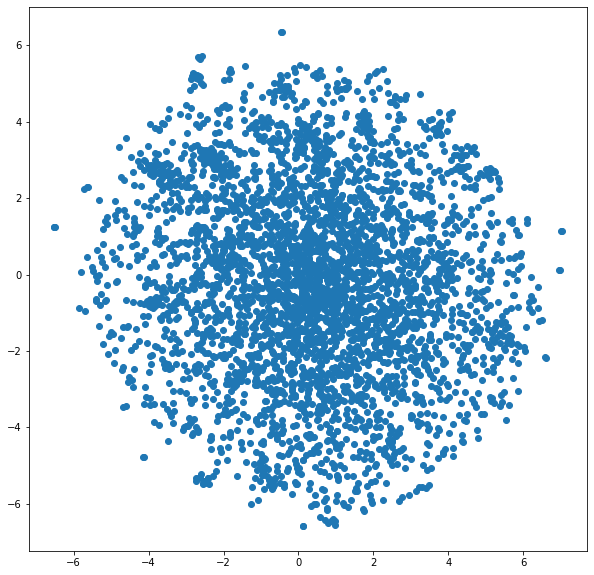

In [36]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, init='random', perplexity=30).fit_transform(doc_vector)

plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(X_embedded[:,0],X_embedded[:,1])
plt.show()

In [39]:
len(doc_vector[0])

200

## Baseline Modeling

In [58]:
# Separating Target Variables
cohesion = proc_data_3.cohesion.values
syntax = proc_data_3.syntax.values
vocabulary = proc_data_3.vocabulary.values
phraseology = proc_data_3.phraseology.values
grammar = proc_data_3.grammar.values
conventions = proc_data_3.conventions.values

Y = proc_data_3[['cohesion','syntax','vocabulary','phraseology','grammar','conventions']]
print(Y)

      cohesion  syntax  vocabulary  phraseology  grammar  conventions
0          3.5     3.5         3.0          3.0      4.0          3.0
1          2.5     2.5         3.0          2.0      2.0          2.5
2          3.0     3.5         3.0          3.0      3.0          2.5
3          4.5     4.5         4.5          4.5      4.0          5.0
4          2.5     3.0         3.0          3.0      2.5          2.5
...        ...     ...         ...          ...      ...          ...
3906       2.5     3.0         3.0          3.5      2.5          2.5
3907       4.0     4.0         4.0          4.0      3.5          3.0
3908       2.5     3.0         3.0          3.0      3.5          3.0
3909       4.0     4.5         4.5          4.0      4.5          4.5
3910       3.5     2.5         3.5          3.0      3.0          3.5

[3911 rows x 6 columns]


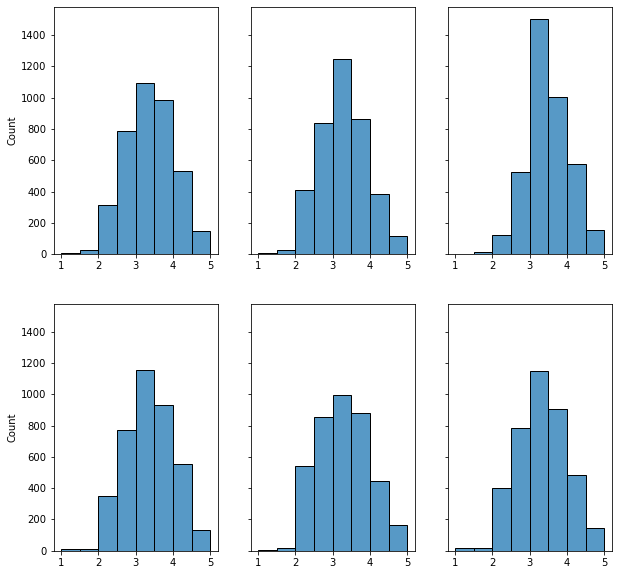

In [52]:
_, axes = plt.subplots(2, 3, sharey=True, figsize=(10, 10))
sns.histplot(cohesion, ax=axes[0,0], bins=8)
sns.histplot(syntax, ax=axes[0,1], bins=8)
sns.histplot(vocabulary, ax=axes[0,2], bins=8)
sns.histplot(phraseology, ax=axes[1,0], bins=8)
sns.histplot(grammar, ax=axes[1,1], bins=8)
sns.histplot(conventions, ax=axes[1,2], bins=8)


In [64]:
X = pd.DataFrame(doc_vector)
X['sent_count']=proc_data_3['sent_count']
X['sent_len']=proc_data_3['sent_len']
X['word_count']=proc_data_3['word_count']
X

# Tabular representation of our data

0         1         2         3         4         5         6  \
0    -0.179214  0.356290 -0.114753  0.521641 -0.211414 -0.112839 -0.528706   
1    -0.170914 -0.171819  0.333515 -0.271629  0.145531 -0.223681  0.402173   
2     0.446901  0.593635 -0.556510  0.734098 -0.358913 -0.086004 -0.275171   
3    -0.126590 -0.672814 -0.228914 -0.837389  0.240610 -1.427670  0.839180   
4    -0.220878 -0.465762 -0.038425  0.693283 -0.590883 -0.061557 -0.418841   
...        ...       ...       ...       ...       ...       ...       ...   
3906  0.090277 -0.218029 -1.125503  0.312250  0.535365  0.559597 -0.514516   
3907 -0.483668 -0.685489  0.172665 -0.116938  0.502064 -0.441247  0.571535   
3908 -0.501839 -0.204954  0.163235 -0.284400 -0.428505 -0.024219  0.156125   
3909 -0.762649 -1.732807 -0.578913  1.193956  0.380346 -0.595412  0.129188   
3910 -1.028789 -0.591357 -0.323096  0.309771  0.478953 -0.730717 -0.347265   

             7         8         9  ...       193       194       195  \
0     0.656564 -0.300483  1.151588  ...  0.606738  0.496825 -0.799055   
1     0.894281  0.608721  0.173030  ...  0.132468  0.070377  0.473242   
2     0.026408  0.389987  1.324631  ...  0.148761  0.885454 -0.762823   
3     0.186094 -0.104259  0.416369  ...  0.318731  1.204564  0.661944   
4     0.363514 -0.961032 -0.251499  ...  0.237479 -0.419751 -0.256970   
...        ...       ...       ...  ...       ...       ...       ...   
3906  0.371922  0.392657 -0.260121  ...  0.547094  0.582711  0.171655   
3907  0.506323 -0.116704  0.561754  ... -0.618443  0.290135 -0.170314   
3908 -0.011682  0.314756  0.307994  ...  0.508485  0.066110  0.076742   
3909  0.370553  0.163133 -0.076796  ... -0.414380 -0.445006 -0.479151   
3910  0.113774  0.177395  0.675849  ...  0.156510 -0.175296  0.058426   

           196       197       198       199  sent_count   sent_len  \
0     0.174988 -0.673146  0.464546  1.005852          18  14.500000   
1     0.039449 -0.244706 -0.526570  0.339428          14  38.071429   
2     0.294997  0.391588  0.430580  0.473169          19  16.842105   
3    -0.624463 -0.443464  1.320315 -0.359129          36  20.222222   
4    -0.234229 -0.562201 -0.006396  0.488925           3  78.000000   
...        ...       ...       ...       ...         ...        ...   
3906 -0.175508 -0.215227 -0.008022  0.694553           6  29.833333   
3907 -0.457711 -0.345367  0.110845  0.268452          16  29.062500   
3908  0.502115 -0.582722  0.295118 -0.172138           8  32.125000   
3909 -0.043695 -0.636893  0.672943 -0.401789          21  24.285714   
3910  0.281696 -0.015002  0.821714 -0.523947          10  63.800000   

      word_count  
0            261  
1            533  
2            320  
3            728  
4            234  
...          ...  
3906         179  
3907         465  
3908         257  
3909         510  
3910         638  

[3911 rows x 203 columns]

In [67]:
# Inspecting Cohesion
X = X
y = Y['cohesion']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (3128, 203)
X_test:  (783, 203)
y_train:  (3128,)
y_test:  (783,)


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

import xgboost as xgb
import catboost as cb

from sklearn.metrics import mean_squared_error

# SVR
# XGBRegressor
# RFRegressor
# AdaboostRegressor
# Catboost

mods = [LinearRegression, RandomForestRegressor, SVR, xgb.XGBRegressor, cb.CatBoostRegressor]
mods

[sklearn.linear_model._base.LinearRegression,
 sklearn.ensemble._forest.RandomForestRegressor,
 sklearn.svm._classes.SVR,
 xgboost.sklearn.XGBRegressor,
 catboost.core.CatBoostRegressor]

In [83]:
def dmp_first_regressor(model):
    regressor = model()
    regressor.fit(X_train, y_train)
    y_preds=regressor.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    #print('RMSE with ',model,' is ',rmse)
    return rmse


In [ ]:
for i in mods:
    print(i)
    mod_run=dmp_first_regressor(i)
    print('\n')

In [85]:
output=[]
for i in (Y.columns):
    #print("Currently investigating ",i)
    X = X
    y = Y[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    for j in mods:
        #print ('Current Model is ',j)
        nested_output=[i,j,dmp_first_regressor(j)]
        print(nested_output)
        output.append(nested_output)
    print(output)


['cohesion', <class 'sklearn.linear_model._base.LinearRegression'>, 0.5370925359606139]
['cohesion', <class 'sklearn.ensemble._forest.RandomForestRegressor'>, 0.5671122881598182]
['cohesion', <class 'sklearn.svm._classes.SVR'>, 0.5977252549796671]
['cohesion', <class 'xgboost.sklearn.XGBRegressor'>, 0.6011611357395854]
Learning rate set to 0.049027
0:	learn: 0.6602864	total: 19.1ms	remaining: 19.1s
1:	learn: 0.6559014	total: 28.7ms	remaining: 14.3s
2:	learn: 0.6515702	total: 37.6ms	remaining: 12.5s
3:	learn: 0.6466457	total: 45.2ms	remaining: 11.3s
4:	learn: 0.6420504	total: 54.5ms	remaining: 10.8s
5:	learn: 0.6376074	total: 62.3ms	remaining: 10.3s
6:	learn: 0.6339812	total: 70.4ms	remaining: 9.99s
7:	learn: 0.6302685	total: 79.1ms	remaining: 9.81s
8:	learn: 0.6265967	total: 86.5ms	remaining: 9.52s
9:	learn: 0.6236586	total: 94.3ms	remaining: 9.34s
10:	learn: 0.6207650	total: 102ms	remaining: 9.19s
11:	learn: 0.6178802	total: 111ms	remaining: 9.13s
12:	learn: 0.6151973	total: 119ms	rem

In [86]:
for x in output:
    print(x)

['cohesion', <class 'sklearn.linear_model._base.LinearRegression'>, 0.5370925359606139]
['cohesion', <class 'sklearn.ensemble._forest.RandomForestRegressor'>, 0.5671122881598182]
['cohesion', <class 'sklearn.svm._classes.SVR'>, 0.5977252549796671]
['cohesion', <class 'xgboost.sklearn.XGBRegressor'>, 0.6011611357395854]
['cohesion', <class 'catboost.core.CatBoostRegressor'>, 0.5362381544436924]
['syntax', <class 'sklearn.linear_model._base.LinearRegression'>, 0.5117894892031317]
['syntax', <class 'sklearn.ensemble._forest.RandomForestRegressor'>, 0.5553427945085053]
['syntax', <class 'sklearn.svm._classes.SVR'>, 0.5897682085295065]
['syntax', <class 'xgboost.sklearn.XGBRegressor'>, 0.5660656767036184]
['syntax', <class 'catboost.core.CatBoostRegressor'>, 0.514866391120363]
['vocabulary', <class 'sklearn.linear_model._base.LinearRegression'>, 0.46696122465330553]
['vocabulary', <class 'sklearn.ensemble._forest.RandomForestRegressor'>, 0.49859070225790736]
['vocabulary', <class 'sklearn.s

In [ ]:
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_preds))
print(rmse)


------------

In [193]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(train_x,train_y)
y_preds=model.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, y_preds))
print(rmse)

0.5261617020022412
